# Data Analysis Project
# E-commerce Customer Data For Behavior Analysis


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [140]:
"""Questions
1) What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?
2) Which product categories generate the highest revenue and which are the most popular based on quantity purchased?
3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?
4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?
"""

'Questions\n1) What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?\n2) Which product categories generate the highest revenue and which are the most popular based on quantity purchased?\n3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?\n4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?\n'

In [141]:
data=pd.read_csv("ecommerce_customer_data_custom_ratios.csv")
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [142]:
print("Total rows of data:",len(data))
data=data.drop_duplicates()
print("After removing the duplicates rows:",len(data))

Total rows of data: 250000
After removing the duplicates rows: 250000


In [143]:
data.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [145]:
data.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [146]:
data.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [147]:
data['Returns'].unique()

array([ 0.,  1., nan])

In [148]:
median=data['Returns'].median()
print("median value of Returns:",median)

median value of Returns: 0.0


In [149]:
data['Returns']=data['Returns'].replace(' nan',0.0)
data['Returns']=data['Returns'].fillna(0.0)

### First I replaced nan values with median as 0.0
### I filled null values with median of returns as 0.0

In [150]:
data.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

# 1) What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?


In [151]:
data.head(1)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0


In [152]:
data['Purchase Date']=pd.to_datetime(data['Purchase Date'])

In [153]:
#sns.lineplot(data,x='Purchase Date',y='Total Purchase Amount')

In [154]:
seasonal_patterns=data[['Purchase Date','Total Purchase Amount']]
seasonal_patterns.head()

,Purchase Date,Total Purchase Amount
0,2020-09-08 09:38:32,740
1,2022-03-05 12:56:35,2739
2,2022-05-23 18:18:01,3196
3,2020-11-12 13:13:29,3509
4,2020-11-27 17:55:11,3452


In [155]:
seasonal_patterns['Month']=seasonal_patterns['Purchase Date'].dt.month

C:\Users\karth\AppData\Local\Temp\ipykernel_11860\635804529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_patterns['Month']=seasonal_patterns['Purchase Date'].dt.month


In [156]:
seasonal_patterns.head()

,Purchase Date,Total Purchase Amount,Month
0,2020-09-08 09:38:32,740,9
1,2022-03-05 12:56:35,2739,3
2,2022-05-23 18:18:01,3196,5
3,2020-11-12 13:13:29,3509,11
4,2020-11-27 17:55:11,3452,11


In [157]:
seasonal_patterns['Months']=seasonal_patterns['Month'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",
                                                              6:"Jun",7:"July",8:"Aug",9:"Sep",10:"Oct",
                                                              11:"Nov",12:"Dec"})

C:\Users\karth\AppData\Local\Temp\ipykernel_11860\3210222460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_patterns['Months']=seasonal_patterns['Month'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",


In [158]:
seasonal_patterns.head()

,Purchase Date,Total Purchase Amount,Month,Months
0,2020-09-08 09:38:32,740,9,Sep
1,2022-03-05 12:56:35,2739,3,Mar
2,2022-05-23 18:18:01,3196,5,May
3,2020-11-12 13:13:29,3509,11,Nov
4,2020-11-27 17:55:11,3452,11,Nov


C:\Users\karth\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


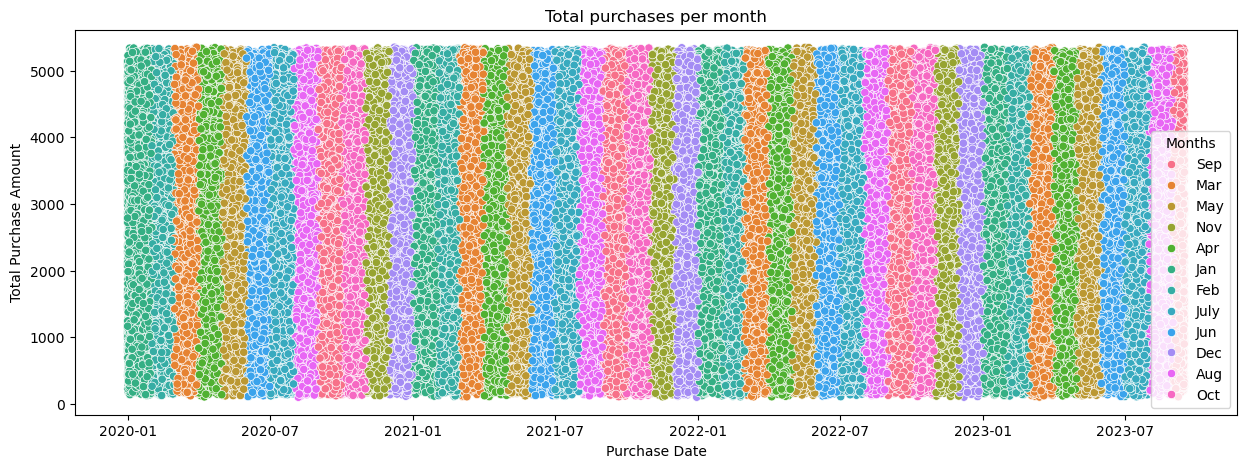

In [159]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=seasonal_patterns,x='Purchase Date',y='Total Purchase Amount',hue='Months')
plt.title("Total purchases per month")
plt.show()

In [160]:
seasonal_sales= seasonal_patterns.groupby('Months')[['Total Purchase Amount','Month']].mean().reset_index()
print(seasonal_sales)


   Months  Total Purchase Amount  Month
0     Apr            2703.365199    4.0
1     Aug            2726.194945    8.0
2     Dec            2738.241791   12.0
3     Feb            2729.320800    2.0
4     Jan            2732.998992    1.0
5    July            2729.720411    7.0
6     Jun            2734.280626    6.0
7     Mar            2734.704981    3.0
8     May            2712.107357    5.0
9     Nov            2729.627167   11.0
10    Oct            2726.825023   10.0
11    Sep            2708.927601    9.0


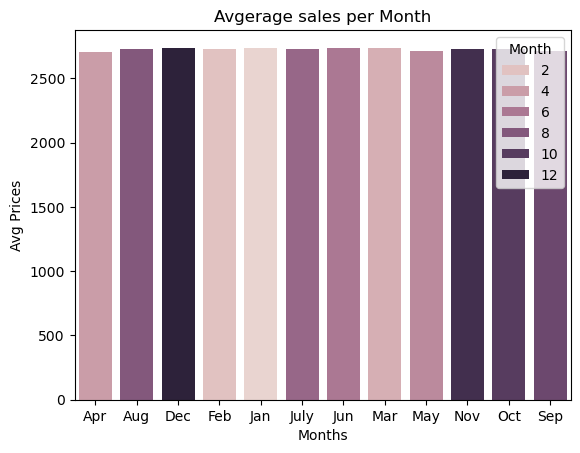

In [161]:
sns.barplot(data=seasonal_sales,x='Months',y='Total Purchase Amount',hue='Month')
plt.title("Avgerage sales per Month")
plt.ylabel("Avg Prices")
plt.show()

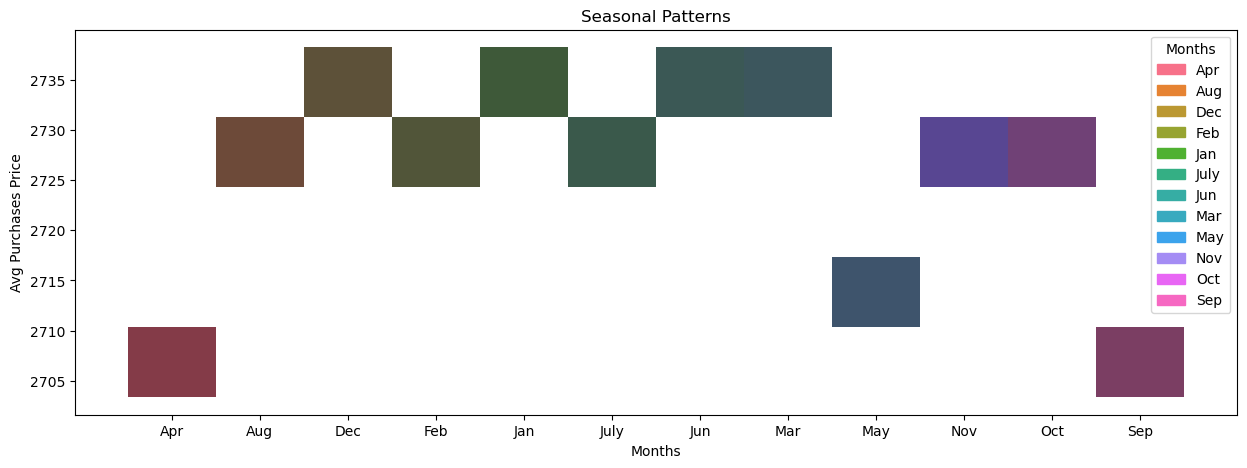

In [162]:
plt.figure(figsize=(15,5))
sns.histplot(data=seasonal_sales,x='Months',y='Total Purchase Amount',kde=True,fill=True,hue='Months')
plt.title("Seasonal Patterns")
plt.ylabel("Avg Purchases Price")
plt.show()

### Yes there is Seasonal Patterns Prices like Dec, JAn, Jun, Mar have highest avg purchases

# 2) Which product categories generate the highest revenue and which are the most popular based on quantity purchased?


In [163]:
data.head(1)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0


In [164]:
product=data[['Product Category','Quantity','Total Purchase Amount','Product Price','Returns']]
product['Total Purchase Amount'] = product['Total Purchase Amount'] - product['Returns']
product.head()

# I removed return amount to total purchase amount

C:\Users\karth\AppData\Local\Temp\ipykernel_11860\4048466374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product['Total Purchase Amount'] = product['Total Purchase Amount'] - product['Returns']


,Product Category,Quantity,Total Purchase Amount,Product Price,Returns
0,Electronics,3,740.0,12,0.0
1,Home,4,2739.0,468,0.0
2,Home,2,3196.0,288,0.0
3,Clothing,1,3509.0,196,0.0
4,Home,1,3452.0,449,0.0


In [165]:
product_sales=product.groupby('Product Category')['Total Purchase Amount'].sum().reset_index()
product_sales

,Product Category,Total Purchase Amount
0,Books,204909372.0
1,Clothing,204502283.0
2,Electronics,136579196.0
3,Home,135251063.0


In [166]:
quantity_purchase=product.groupby('Product Category')['Quantity'].sum().reset_index()
quantity_purchase

,Product Category,Quantity
0,Books,223876
1,Clothing,225322
2,Electronics,150828
3,Home,149698


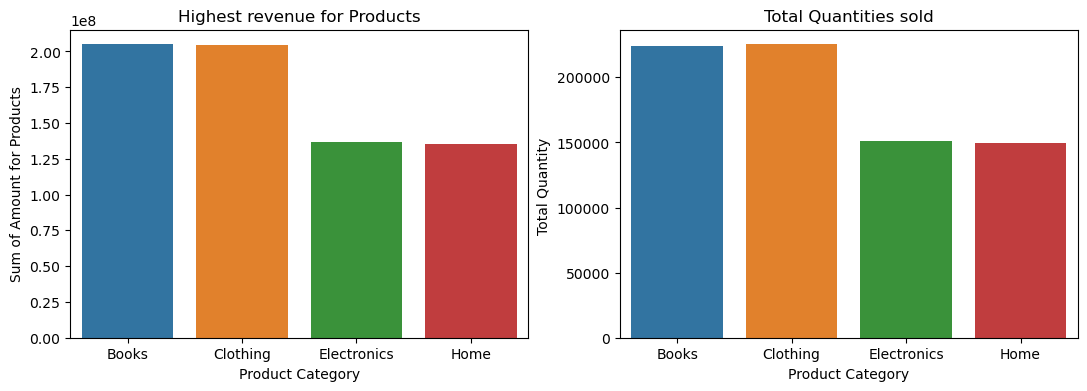

In [167]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.barplot(data=product_sales,x='Product Category',y='Total Purchase Amount',hue='Product Category')
plt.title("Highest revenue for Products")
plt.ylabel("Sum of Amount for Products")
plt.xlabel("Product Category")

plt.subplot(1,2,2)
sns.barplot(data=quantity_purchase,x='Product Category',y='Quantity',hue='Product Category')
plt.title("Total Quantities sold")
plt.ylabel("Total Quantity ")
plt.xlabel("Product Category")

plt.show()

# 3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?


In [168]:
data.head(1)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0


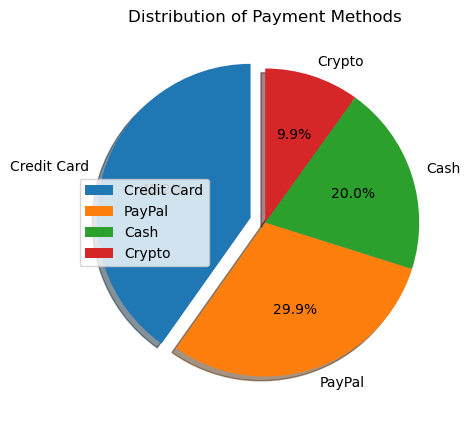

In [169]:
payment_type=data['Payment Method'].value_counts()

plt.figure(figsize=(8, 5))
explode=[0.1,0,0,0]
plt.pie(
    payment_type,              
    labels=payment_type.index, 
    autopct='%1.1f%%', 
    explode=explode,
    shadow=True,
    startangle=90                
)
plt.title("Distribution of Payment Methods")
plt.legend()
plt.show()


In [170]:
payment=data[['Payment Method','Total Purchase Amount']]
payment.head()

,Payment Method,Total Purchase Amount
0,Credit Card,740
1,PayPal,2739
2,PayPal,3196
3,PayPal,3509
4,Credit Card,3452


In [171]:
payment_total=payment.groupby('Payment Method')['Total Purchase Amount'].sum().reset_index()
payment_total

,Payment Method,Total Purchase Amount
0,Cash,135705551
1,Credit Card,274152396
2,Crypto,67458123
3,PayPal,204026613


In [172]:
pay_freq=data['Payment Method'].value_counts().reset_index()
pay_freq.columns = ['Payment Method', 'Frequency']
pay_freq

# frequency of payment methods

,Payment Method,Frequency
0,Credit Card,100486
1,PayPal,74837
2,Cash,49894
3,Crypto,24783


C:\Users\karth\AppData\Local\Temp\ipykernel_11860\589862533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_total,x='Payment Method',y='Total Purchase Amount',palette='viridis')


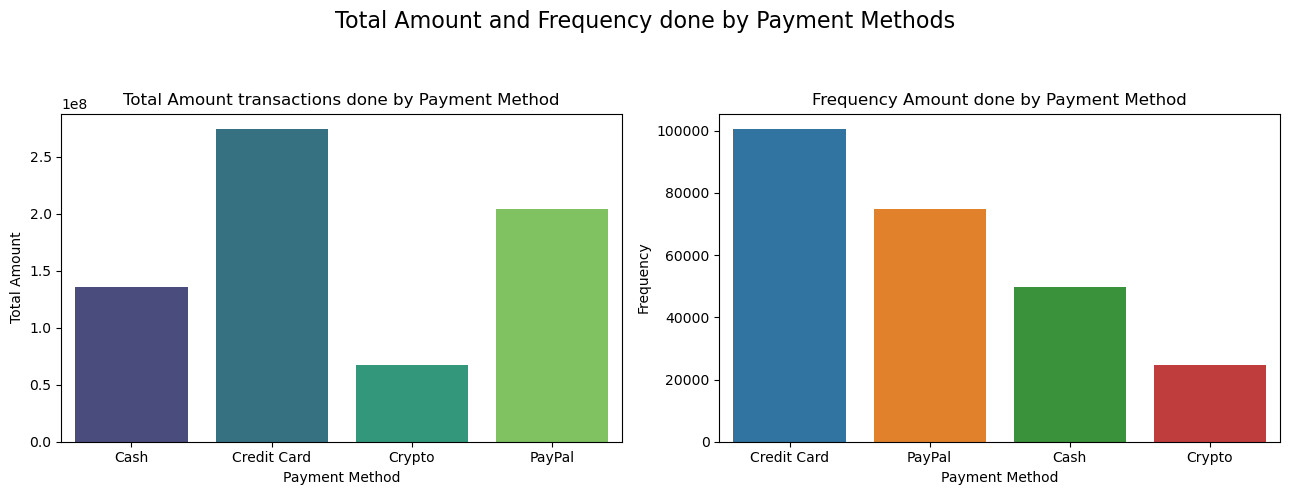

In [173]:
plt.figure(figsize=(13,5))
plt.suptitle("Total Amount and Frequency done by Payment Methods",fontsize=16)


plt.subplot(1,2,1)
sns.barplot(data=payment_total,x='Payment Method',y='Total Purchase Amount',palette='viridis')
plt.title("Total Amount transactions done by Payment Method")
plt.ylabel("Total Amount")

plt.subplot(1,2,2)
sns.barplot(data=pay_freq,x='Payment Method',y='Frequency',hue='Payment Method')
plt.title("Frequency Amount done by Payment Method")
plt.ylabel("Frequency")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?


In [174]:
data.head(1)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0


In [175]:
top_customers=data[['Customer ID','Total Purchase Amount','Customer Name']]
top_customers.head()

,Customer ID,Total Purchase Amount,Customer Name
0,46251,740,Christine Hernandez
1,46251,2739,Christine Hernandez
2,46251,3196,Christine Hernandez
3,46251,3509,Christine Hernandez
4,13593,3452,James Grant


In [189]:
top_cus = top_customers.groupby(['Customer ID', 'Customer Name'])['Total Purchase Amount'].sum().reset_index()
top_cus = top_cus.sort_values(by='Customer ID').reset_index(drop=True)
top_cus.head()


,Customer ID,Customer Name,Total Purchase Amount
0,1,Nicole Johnson,3491
1,2,Marie Wright,7988
2,3,Julie Wolfe,22587
3,4,Tracey Smith,8715
4,5,Nancy Jones,12524


In [190]:
top_cus = top_cus.sort_values(by='Total Purchase Amount', ascending=False).reset_index(drop=True)

top_10_cus = top_cus.head(10)

# Display the top 10 customers
print(top_10_cus)


   Customer ID        Customer Name  Total Purchase Amount
0        36437           Jesse Gray                  55339
1        39817  Dr. Courtney Foster                  51718
2        26977      Felicia Escobar                  48497
3         5844          Maria Owens                  46541
4         3576        Aaron Harrell                  46518
5        13802   Jonathan Schroeder                  46464
6          809        Taylor Bishop                  45738
7        47087         Debbie Lopez                  45700
8        14400    Patricia Petersen                  45334
9        20305        Randall Hobbs                  45044


Text(0, 0.5, 'Sum of Amount')

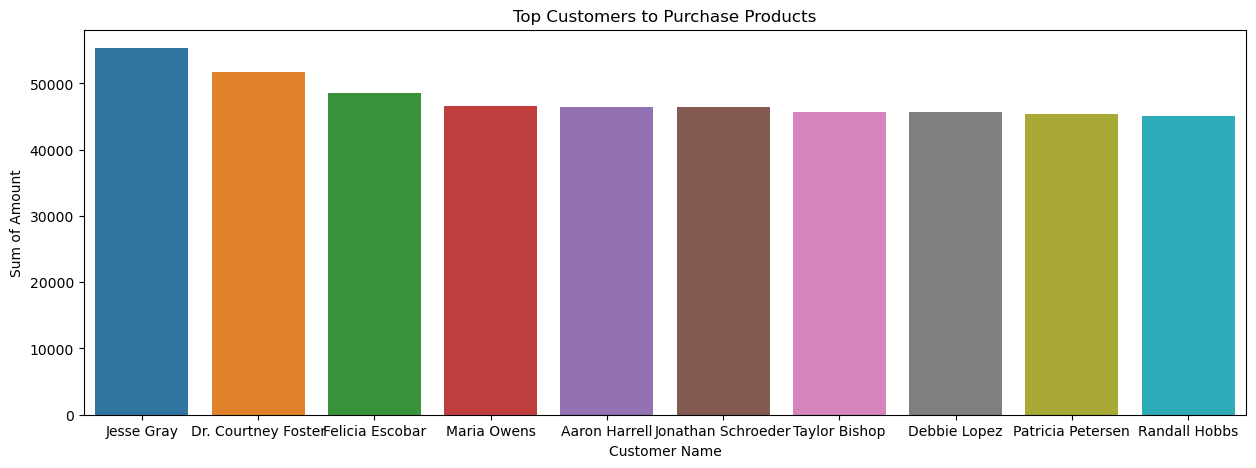

In [191]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_cus,x='Customer Name',y='Total Purchase Amount',hue='Customer Name')
plt.title("Top Customers to Purchase Products")
plt.ylabel("Sum of Amount")